In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pickle
sns.set_context('poster')
import glob
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from scipy.stats import pearsonr, spearmanr
from scipy.stats import wasserstein_distance
import os

%load_ext autoreload
%autoreload 2

In [2]:
path_prefix = '../'
import sys
sys.path.append(path_prefix)
from util import resolution_util as ru
from util import plot_util as pu
from util import ml_util as mu
import atlas_mpl_style as ampl
ampl.set_color_cycle('Oceanic',10)
# plt.style.use('paper')

2021-10-05 11:43:37.670627: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.2


In [3]:
data_dir_simul = '../results/Block_20210831_1455_simult_optimized/'
data_dir_weighted = '../results/Block_20210831_1457_simult_weightedRegress_optimized/'
data_dir_concat = '../results/Block_20211004_1549_simult_concatClass_optimized/'
data_dir_pion = '../../from_pier/ml4pions_graph/results/Block_20210713eve_concatFalse/'
data_dir_pi0 = '../../from_pier/ml4pions_graph/results/Block_20210714eve_concatFalse/'


Loading form ../results/Block_20210831_1455_simult_optimized/
Loading form ../results/Block_20210831_1457_simult_weightedRegress_optimized/ for pi0
Loading form ../results/Block_20211004_1549_simult_concatClass_optimized/ for $pi\pm$


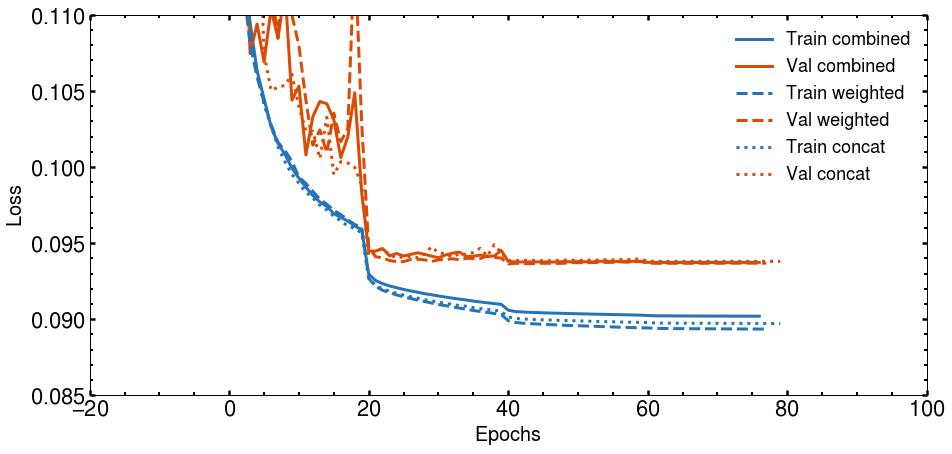

In [4]:
pion_list = ['pion']
sym_list = ['+-',]
concat_type = ['False']
model_name = ['ConcatFalse']
line = ['-', '--', ':']
blues = matplotlib.cm.Blues_r(np.linspace(0,1,20))
oranges = matplotlib.cm.Oranges_r(np.linspace(0,1,20))

plt.figure(figsize=(15,7))
# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir_simul + 'losses.npz'))
print('Loading form {}'.format(data_dir_simul))
hist = np.load(hist_files[0])
plt.plot(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'Train combined', linestyle=line[0])
plt.plot(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'Val combined', linestyle=line[0])

# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir_weighted + 'losses.npz'))
print('Loading form {} for {}'.format(data_dir_weighted, 'pi0'))
hist = np.load(hist_files[0])
plt.plot(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'Train weighted', linestyle=line[1])
plt.plot(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'Val weighted', linestyle=line[1])


# print('\nPlotting losses fro {}'.format(data_dir))
hist_files = np.sort(glob.glob(data_dir_concat + 'losses.npz'))
print('Loading form {} for {}'.format(data_dir_concat, r'$pi\pm$'))
hist = np.load(hist_files[0])
plt.plot(hist['training'].mean(axis=1), color=blues[5, :3], 
             label=r'Train concat', linestyle=line[2])
plt.plot(hist['validation'].mean(axis=1), color=oranges[5, :3], 
             label=r'Val concat', linestyle=line[2])


plt.ylabel(r'$Loss$')
plt.xlabel(r'$Epochs$')
plt.ylim([.085, .11])
# sns.despine()
plt.legend()
    # plt.savefig('results/training_mse.png', bbox_inches='tight', dpi=300)
plt.show()


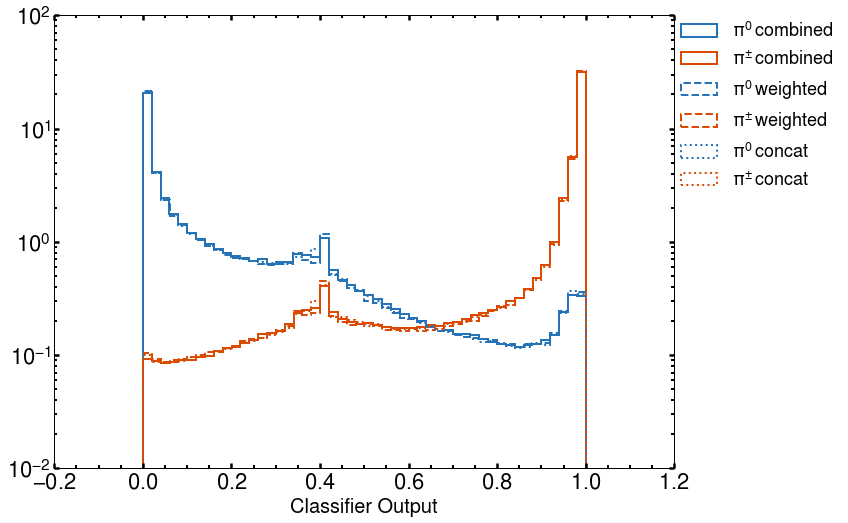

In [5]:
predictions_simul = np.load(data_dir_simul+'/predictions.npz')
targets_class_simul = predictions_simul['targets'][:, 1]
outputs_class_simul = predictions_simul['outputs'][:, 1]

predictions_weighted = np.load(data_dir_weighted+'/predictions.npz')
targets_class_weighted = predictions_weighted['targets'][:, 1]
outputs_class_weighted = predictions_weighted['outputs'][:, 1]

predictions_concat = np.load(data_dir_concat+'/predictions.npz')
targets_class_concat = predictions_concat['targets'][:, 1]
outputs_class_concat = predictions_concat['outputs'][:, 1]

plt.hist(outputs_class_simul[targets_class_simul==0], 50, density=True, histtype='step', 
         color=blues[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{0}\,combined$')
plt.hist(outputs_class_simul[targets_class_simul==1], 50, density=True, histtype='step', 
         color=oranges[5, :3], linewidth=2, linestyle=line[0], label='$\\pi^{\\pm}\,combined$')

plt.hist(outputs_class_weighted[targets_class_weighted==0], 50, density=True, histtype='step', 
         color=blues[5, :3], linewidth=2, linestyle=line[1], label='$\\pi^{0}\,weighted$')
plt.hist(outputs_class_weighted[targets_class_weighted==1], 50, density=True, histtype='step', 
         color=oranges[5, :3], linewidth=2, linestyle=line[1], label='$\\pi^{\\pm}\,weighted$')

plt.hist(outputs_class_concat[targets_class_concat==0], 50, density=True, histtype='step', 
         color=blues[5, :3], linewidth=2, linestyle=line[2], label='$\\pi^{0}\,concat$')
plt.hist(outputs_class_concat[targets_class_concat==1], 50, density=True, histtype='step', 
         color=oranges[5, :3], linewidth=2, linestyle=line[2], label='$\\pi^{\\pm}\,concat$')

plt.legend(loc=[1, .6])
plt.xlabel('Classifier Output')
plt.yscale('log')
plt.show()

In [6]:
resp_median_simul = np.load(data_dir_simul+'/response_medians.npz')['response_median']
resp_median_weighted = np.load(data_dir_weighted+'/response_medians.npz')['response_median']
resp_median_concat = np.load(data_dir_concat+'/response_medians.npz')['response_median']
resp_median_pion = np.load(data_dir_pion+'/response_medians.npz')['response_median']
resp_median_pi0 = np.load(data_dir_pi0+'/response_medians.npz')['response_median']

response_median_pions = np.vstack([resp_median_pion[0], 
                                   resp_median_simul[2], 
                                   resp_median_weighted[2], 
                                   resp_median_concat[2]])

response_median_pi0 = np.vstack([resp_median_pi0[0], 
                                 resp_median_simul[1], 
                                 resp_median_weighted[1], 
                                 resp_median_concat[1]])
xcenter = resp_median_pi0 = np.load(data_dir_pi0+'/response_medians.npz')['xcenter']

FileNotFoundError: [Errno 2] No such file or directory: '../results/Block_20211004_1549_simult_concatClass_optimized//response_medians.npz'

In [ ]:
pu.lineOverlay(xcenter=xcenter, lines=response_median_pions,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{\pm}\:Only$', r'$\pi^{\pm}\:Combined$', 
                          r'$\pi^{\pm}\:Weighted$', r'$\pi^{\pm}\:Concat$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '', # medResponse_gnBlock.png',
                y_max=1.2, y_min=.9, x_min = .3,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

In [ ]:
pu.lineOverlay(xcenter=xcenter, lines=response_median_pi0,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:Only$', r'$\pi^{0}\:Combined$', 
                          r'$\pi^{0}\:Weighted$', r'$\pi^{0}\:Concat$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response Median',
                figfile = '', # medResponse_gnBlock.png',
                y_max=1.2, y_min=.9, x_min = .3,
                extra_lines= [[[0, 10e3], [1, 1]]],
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.05, atlas_y = 0.85, simulation = True,
                textlist = [{'x': 0.05, 'y': 0.775, 'text': 'Single $pions$'},
                            {'x': 0.05, 'y': 0.725,  'text': 'Regression Comparison'}])

In [ ]:
iqr_simul = np.load(data_dir_simul+'/iqr.npz')['response_median']
iqr_weighted = np.load(data_dir_weighted+'/iqr.npz')['response_median']
iqr_concat = np.load(data_dir_concat+'/iqr.npz')['response_median']
iqr_pion = np.load(data_dir_pion+'/iqr.npz')['response_median']
iqr_pi0 = np.load(data_dir_pi0+'/iqr.npz')['response_median']

iqr_pions = np.vstack([iqr_pion[0], 
                       iqr_simul[2], 
                       iqr_weighted[2], 
                       iqr_concat[2]])

iqr_pi0 = np.vstack([iqr_pi0[0], 
                     iqr_simul[1], 
                     iqr_weighted[1], 
                     iqr_concat[1]])
xcenter = np.load(data_dir_pi0+'/iqr.npz')['xcenter']

In [ ]:
pu.lineOverlay(xcenter=xcenter, lines = iqr_pions,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{\pm}\:Only$', r'$\pi^{\pm}\:Combined$', 
                          r'$\pi^{\pm}\:Weighted$', r'$\pi^{\pm}\:Concat$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '', # 'iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])

In [ ]:
pu.lineOverlay(xcenter=xcenter, lines = iqr_pi0,  # [iqrOverMedpi0, iqrOverMedpiplus, iqrOverMedpiminus],
                labels = [r'$\pi^{0}\:Only$', r'$\pi^{0}\:Combined$', 
                          r'$\pi^{0}\:Weighted$', r'$\pi^{0}\:Concat$'],
                xlabel = 'Cluster Calib Hits [GeV]', ylabel = 'Response IQR / 2 x Median',
                figfile = '', # 'iqr_gnBlock.png',
                y_max = .6, x_min = .3,
                linestyles = ['solid', 'solid', 'solid', 'solid',],
                atlas_x = 0.5, atlas_y = 0.375, simulation = True,
                textlist = [{'x': 0.5, 'y': 0.275, 'text': 'Single $pions$'},
                            {'x': 0.5, 'y': 0.225,  'text': 'Regression Comparison'}])